| **Chapter**                   | 3: Host factors                                                    |
| ----------------------------- |--------------------------------------------------------------------|
| **Computational Note**        | 3.1: Calculating the $\mathfrak{R}_0$ of complex stratified models |
| **Package prerequisites**     | [SymPy](https://www.sympy.org/en/index.html)                       |

# Calculating the $\mathfrak{R}_0$ of complex stratified models

In [1]:
import numpy as np
from sympy.interactive.printing import init_printing
init_printing(use_unicode=True, wrap_line=True)
from sympy.matrices import Matrix
from sympy import symbols
from sympy import factor
from sympy import latex
from sympy import lambdify

In [2]:
%load_ext watermark
%watermark --iversions -v -a "Chris von Csefalvay" -gu "chrisvoncsefalvay" -p sympy

Author: Chris von Csefalvay

Github username: chrisvoncsefalvay

Python implementation: CPython
Python version       : 3.10.2
IPython version      : 8.4.0

sympy: 1.10.1

numpy: 1.22.4



In [3]:
I_H, I_L, beta_HH, beta_HL, beta_LH, beta_LL, gamma_H, gamma_L, n_H, n_L = symbols("I_H I_L beta_HH beta_HL beta_LH beta_LL gamma_H gamma_L n_H n_L")

In [4]:
infectious_system = Matrix(np.array([I_H, I_L]).T)

In [5]:
d_Is = Matrix(np.array([(beta_HH * n_H - gamma_H) * I_H + (beta_HL * n_H) * I_L,
                        beta_LH * n_L * I_H + (beta_LL * n_L - gamma_L) * I_L]).T)

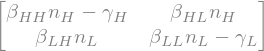

In [6]:
coeffs = d_Is.jacobian(infectious_system)
coeffs

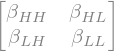

In [7]:
beta = Matrix([[beta_HH, beta_HL], [beta_LH, beta_LL]])
beta

In [9]:
J = coeffs.subs({beta_HH: 10,
                 beta_HL: 0.5,
                 beta_LH: 0.5,
                 beta_LL: 2,
                 n_H: 0.2,
                 n_L: 0.8,
                 gamma_H: 0.05,
                 gamma_L: 0.05})

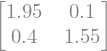

In [13]:
J

In [14]:
R_0 = max([abs(i) for i in J.eigenvals()])

In [15]:
R_0